# Introduction 

In [22]:
# Import packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data
df = pd.read_csv("vehicles.csv")

# Pre - Exploration

In [3]:
print("The data has {rows} rows and {columns} columns".format(rows = df.shape[0], columns = df.shape[1]))

The data has 539759 rows and 25 columns


Columns explanation as provided by the Kaggle website

- id: *entry ID*
- url: *listing URL*
- region: *craigslist region*
- region_url: *region URL*
- price: *entry price*
- year: *entry year*
- manufacturer: *manufacturer of vehicle*
- model:*model of vehicle*
- condition: *condition of vehicle*
- cylinders: *number of cylinders*
- fuel: *fuel type*
- odometer: *miles traveled by vehicle*
- title_status: *title status of vehicle*
- transmission: *transmission of vehicle*
- vin: *vehicle identification number*
- drive: *type of drive*
- size: *size of vehicle*
- type: *generic type of vehicle*
- paint_color: *color of vehicle*
- image_url: *image URL*
- description: *listed description of vehicle*
- county: *useless column left in by mistake*
- state: *state of listing*
- lat: *latitude of listing*
- long: *longitude of listing*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 
 11  odometer      440783 non-null  float64
 12  title_status  536819 non-null  object 
 13  transmission  535786 non-null  object 
 14  vin           315349 non-null  object 
 15  drive         383987 non-null  object 
 16  size          168550 non-null  object 
 17  type          392290 non-null  object 
 18  pain

In [5]:
print("There are {} duplicates rows".format(df.duplicated().sum()))

There are 0 duplicates rows


In [12]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,vin,drive,size,type,paint_color,image_url,description,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,19UUA8F22CA003926,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,NaN,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,5J6YH18314L006498,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,1GC1KWE85GF266427,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",ne,41.1345,-96.2458


In [6]:
df.describe()

,id,price,year,odometer,county,lat,long
count,5.397590e+05,5.397590e+05,538772.000000,4.407830e+05,0.0,530785.000000,530785.000000
mean,7.087609e+09,1.954214e+05,2009.830982,1.008008e+05,NaN,38.432128,-94.040501
std,5.234176e+06,2.208252e+07,9.161334,1.767058e+05,NaN,5.916936,17.626658
min,7.065765e+09,0.000000e+00,0.000000,0.000000e+00,NaN,-84.911400,-176.810000
25%,7.084240e+09,4.400000e+03,2007.000000,4.703850e+04,NaN,34.197100,-106.782000
50%,7.088973e+09,9.500000e+03,2012.000000,9.330000e+04,NaN,39.077600,-88.100900
75%,7.092094e+09,1.792600e+04,2015.000000,1.377550e+05,NaN,42.449100,-81.219000
max,7.093537e+09,4.294967e+09,2021.000000,6.480922e+07,NaN,84.514800,161.016000


In [ ]:
df.drop('county', axis = 1, inplace = True)

In [11]:
df['price'].describe()

count    5.397590e+05
mean     1.954214e+05
std      2.208252e+07
min      0.000000e+00
25%      4.400000e+03
50%      9.500000e+03
75%      1.792600e+04
max      4.294967e+09
Name: price, dtype: float64

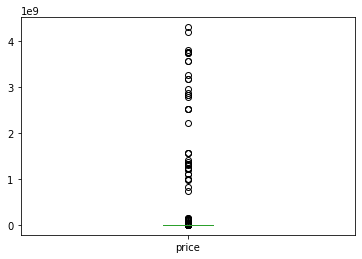

In [19]:
df.price.plot(kind = 'box')
plt.show()

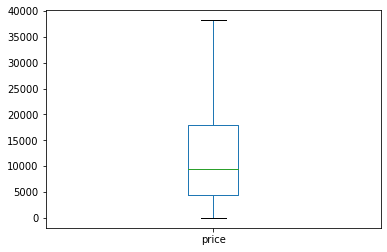

In [20]:
df.price.plot(kind = 'box', showfliers = False)
plt.show()

### To-Do

- Write description (i.e. problem statement)
- Write comments in the code
- Write observations (e.g. country dropped)

# Missing values

In [ ]:
cols_na = [col for col in df.columns if df[col].isnull().sum() > 0]
cols_na

In [ ]:
df_na = pd.Series((df[cols_na].isnull().mean()) * 100).sort_values(ascending = False)
df_na

In [ ]:
cols_005 = df_na[df_na < 5]
cols_005.index

In [ ]:
df_copy = df.copy()
# image_url
df_copy.drop('image_url', axis = 1, inplace = True)

In [ ]:
# description will be used to count how many words are present and then broker down into categories
# so if na --> 0
print("There were {} na values".format(df_copy['description'].isna().sum()))
df_copy['description'].fillna(0, inplace = True)
print("There are {} na values now".format(df_copy['description'].isna().sum()))

In [ ]:
# year
df_copy['year'].describe()

In [ ]:
# original variable distribution
df_copy['year'].plot(kind='kde', xlim = (1))

For these that have less than 5% missing values

In [ ]:
cols_005 = df_na[df_na < 5]
cols_005.index

In [ ]:
df.drop('county', axis = 1, inplace = True)

In [ ]:
df['model'].unique()

# Outliers

# Feature Engineering